In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Defining constants for the grid
OBSTACLE = -2
START = 0
FINISH = 5
REWARD = 1
EMPTY = -1

# Creating a grid world class
class GridWorld:
    def __init__(self):
        # Define the grid layout
        self.grid = np.array([
            [START, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY, EMPTY, OBSTACLE, OBSTACLE, OBSTACLE, OBSTACLE, EMPTY, EMPTY],
            [EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, EMPTY, FINISH, REWARD, REWARD, REWARD],
            [REWARD, REWARD, REWARD, REWARD, REWARD, REWARD, OBSTACLE, OBSTACLE, REWARD, REWARD]
        ])
        
        # Start position
        self.start_pos = (0, 0)
        
        # Finish position
        self.finish_pos = np.argwhere(self.grid == FINISH)[0]
        
        # Initialize the current position
        self.current_pos = self.start_pos
        
        # Define the size of the grid
        self.grid_shape = self.grid.shape
        
        # Define the reward for each type of square
        self.reward_map = {
            OBSTACLE: -2,
            START: 0,
            FINISH: 5,
            REWARD: 1,
            EMPTY: -1
        }
        
        self.color_map = {
            'A': ('blue', 1.0),   # Agent
            -2: ('black', 1.0),   # Obstacle
            -1: ('red', 0.5),     # Negative Reward
            1: ('green', 0.5),    # Positive Reward
            5: ('yellow', 1.0),   # High Reward
            0: ('orange', 0.5) # Neutral/Empty space with transparency
        }
        # Define the possible actions
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        # Reset the position to the start
        self.current_pos = self.start_pos
        return self.current_pos
    
    def step(self, action):
        # Get the current position
        x, y = self.current_pos
        new_x, new_y = x, y
        
        # Update position based on action
        if action == 'up' and x > 0:
            new_x -= 1
        elif action == 'down' and x < self.grid_shape[0] - 1:
            new_x += 1
        elif action == 'left' and y > 0:
            new_y -= 1
        elif action == 'right' and y < self.grid_shape[1] - 1:
            new_y += 1
        
        if self.grid[new_x, new_y] == OBSTACLE:
            new_x, new_y = x, y

        # Set the new position
        self.current_pos = (new_x, new_y)
        
        # Calculate the reward
        reward = self.reward_map[self.grid[x, y]]
        
        # Check if the new position is the finish position
        done = self.current_pos == tuple(self.finish_pos)
        
        # Return the new position, reward, and done status
        return self.current_pos, reward, done
    
    def render(self):
        # Create a colored grid visualization
        fig, ax = plt.subplots()
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                cell_value = self.grid[i, j]
                if (i, j) == self.current_pos:
                    cell_value = 'A'  # Override for agent
                color, alpha = self.color_map[cell_value]
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, alpha=alpha))
        
        # Set up the plot aesthetics
        plt.xticks(np.arange(self.grid.shape[1] + 1), [])
        plt.yticks(np.arange(self.grid.shape[0] + 1), [])
        ax.grid(which='both', color='gray', linestyle='-', linewidth=2)
        ax.invert_yaxis()  # Invert y-axis to match the array representation
        plt.show()

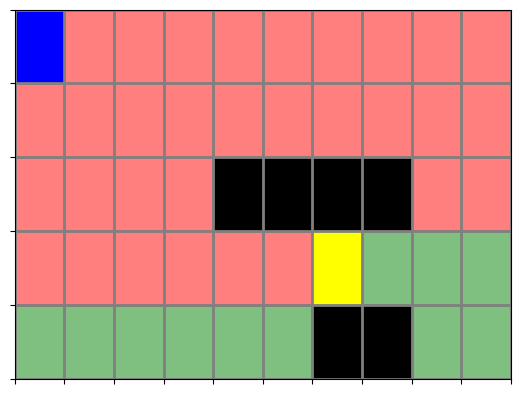

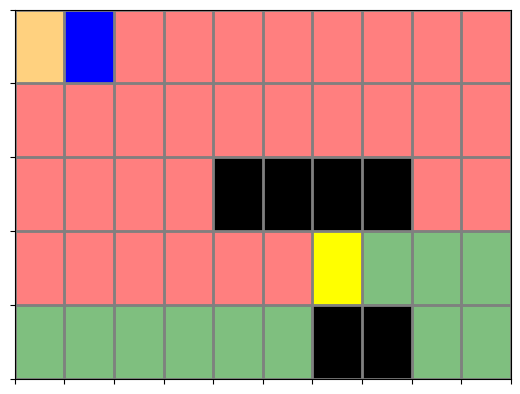

((0, 1), 0, False)

In [20]:
# Testing the environment
env = GridWorld()
env.reset()
env.render()  # Render the initial grid world with the agent at the start

# Example of taking an action
new_pos, reward, done = env.step('right')  # Move right
env.render()  # Render the grid world after taking the action

# Output the result of the step to check if it's correct
new_pos, reward, done

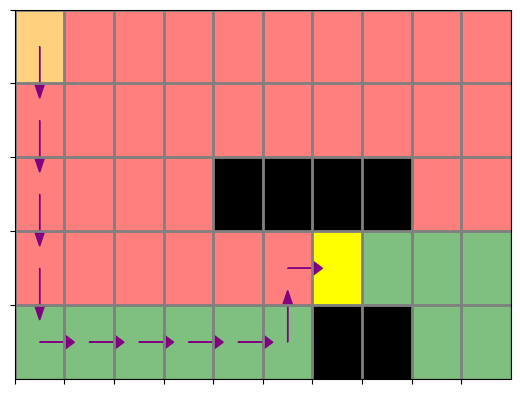

In [36]:
def draw_policy_with_arrows(env, policy):
    # Start from the start position
    x, y = env.start_pos

    # Create a colored grid visualization
    fig, ax = plt.subplots()
    for i in range(env.grid.shape[0]):
        for j in range(env.grid.shape[1]):
            cell_value = env.grid[i, j]
            color, alpha = env.color_map[cell_value]
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, alpha=alpha))

    # Draw the policy with arrows
    for action in policy:
        if action == 'up':
            dx, dy = -1, 0
        elif action == 'down':
            dx, dy = 1, 0
        elif action == 'left':
            dx, dy = 0, -1
        elif action == 'right':
            dx, dy = 0, 1

        # Draw the arrow and update the position
        ax.arrow(y+ 0.5, x+ 0.5, dy * 0.5, dx * 0.5, head_width=0.2, head_length=0.2, fc='purple', ec='purple')
        x, y = x + dx, y + dy

    # Set up the plot aesthetics
    plt.xticks(np.arange(env.grid.shape[1]), [])
    plt.yticks(np.arange(env.grid.shape[0]), [])
    plt.ylim(0, env.grid.shape[0])
    plt.xlim(0, env.grid.shape[1])
    ax.grid(which='both', color='gray', linestyle='-', linewidth=2)
    ax.invert_yaxis()  # Invert y-axis to match the array representation
    plt.show()

# Define the policy
policy = ['down', 'down', 'down', 'down', 'right', 'right', 'right', 'right', 'right', 'up', 'right']

# Draw the policy on the gridworld
draw_policy_with_arrows(env, policy)

In [31]:
env.grid.shape[0]

5